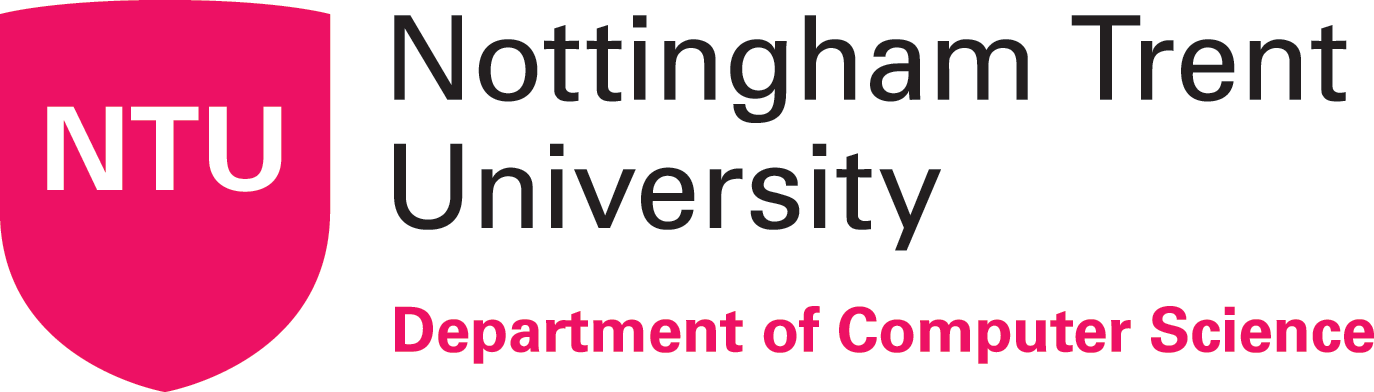

# Python Programming for Real World Data Analytics and GUI Development
## SOFT40161 - Introduction to Computer Programming
### Submission of the Coursework

## Name: Shona Tippins
## NTU ID: N0954098

<font  color= 'red'> **The Full description of the Coursework is here -** </font>
<a href="https://now.ntu.ac.uk/d2l/le/content/1110621/viewContent/14307207/View">SOFT40161-Coursework (Click here)</a>

## Start your answer here-
<font  color= 'green'> **https://github.com/shonatippins/NHS-AE-Analysis.git** </font>

Please add your Link here: <a href="https://github.com/">Update the link and text (Click here)</a>

## NHS A&E Waiting Times Analysis and Hospital Finder GUI

This project analyses real NHS Accident & Emergency (A&E) waiting time data for hospitals in England. The aim is to understand how A&E performance varies between hospitals and over time, and to build a simple Graphical User Interface (GUI) that allows users to select a hospital and view its waiting time performance and trends. The dataset used is the official NHS England A&E attendances and emergency admissions statistics, which report, for each provider, the number of attendances and the percentage of patients seen within four hours of arrival.

### 
Overview of the Dataset
The dataset used in this project is taken from the most recent monthly CSV files published by
NHS England. These files contain official statistics on:

- A&E attendances across Types 1, 2, and Other departments  
- Emergency admissions via A&E  
- Patients waiting 4–12 hours and 12+ hours from decision-to-admit (DTA)  
- Trust-level performance indicators  

The dataset provides a detailed view of operational pressures within NHS emergency
departments and is widely used to monitor performance, identify bottlenecks, and support
healthcare planning.

###

Real‑World Problem
A&E services across England continue to experience rising demand, increasing waiting times,
and significant operational strain. Long waits (particularly 12+ hours) have become a key
indicator of system pressure. Understanding these patterns is essential for:

- Resource allocation  
- Capacity planning  
- Identifying trusts under the most pressure  
- Supporting policy and operational decisions  

This analysis aims to explore these trends and present them through clear visualisations and
an interactive dashboard.

###




# Section 1: Control Structures (12 marks)


## 
This section demonstrates the use of control structures (loops, conditionals, and error‑handling) to import, validate, and analyse a real‑world dataset. The dataset is sourced from a publicly accessible sharable link, meeting the requirement for external data import.

The chosen dataset relates to public health, specifically NHS A&E performance data. This dataset is suitable for demonstrating problem‑solving, data validation, and conditional analysis because it contains numerical trends, anomalies, and operational indicators.

## 
Waiting Time Analysis Using Control Structures
To analyse A&E waiting times, I focused on three key metrics available in the dataset:

- Patients waiting 4–12 hours
- Patients waiting 12+ hours

Using Python control structures (loops, if statements, sorting, and aggregation), I derived several insights:

- Identified trusts with unusually high numbers of long waits (12+ hours).
- Calculated the average number of long waits across all providers.
- Detected anomalies by comparing each trust’s waiting times to the overall mean.
- Ranked trusts by the highest number of 4–12 hour and 12+ hour waits.
- Calculated the proportion of patients waiting over 4 hours relative to total attendances.

These control structures allowed me to automatically detect performance issues and highlight trusts experiencing significant operational pressure.


In [83]:
import pandas as pd
import numpy as np
import requests
import statistics

url = "https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2025/12/November-2025-CSV-G9pr3.csv"

df = pd.read_csv(url)
df.head()


,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,...,Attendances over 4hrs Other Department,Attendances over 4hrs Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions
0,MSitAE-NOVEMBER-2025,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0,0,2802,0,0,19,...,13,0,0,0,0,0,0,0,0,0
1,MSitAE-NOVEMBER-2025,RW1,NHS ENGLAND SOUTH EAST,HAMPSHIRE AND ISLE OF WIGHT HEALTHCARE NHS FOU...,0,0,2719,0,0,0,...,33,0,0,0,0,0,0,0,0,121
2,MSitAE-NOVEMBER-2025,RYY,NHS ENGLAND SOUTH EAST,KENT COMMUNITY HEALTH NHS FOUNDATION TRUST,0,0,6044,0,0,0,...,27,0,0,0,0,0,0,0,0,0
3,MSitAE-NOVEMBER-2025,AAH,NHS ENGLAND SOUTH WEST,TETBURY HOSPITAL TRUST LTD,0,0,503,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MSitAE-NOVEMBER-2025,C82009,NHS ENGLAND MIDLANDS,MARKET HARBOROUGH MED.CTR,0,0,311,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1.2 Use of Control Structures in the Analysis Control structures were used throughout this section to import, validate, and analyse the dataset. These structures allowed the notebook to handle real-world data safely and generate insights based on specific conditions. 


###  
**Conditional Statements (`if`, `elif`, `else`)** Conditional logic was used to: - Validate that the dataset loaded correctly - Check whether required columns existed before processing - Identify trusts with unusually high waiting times - Detect simple trends in the data (e.g., increases or decreases in attendances) 

In [84]:
import pandas as pd

# Publicly accessible CSV link 
url = "https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2025/12/November-2025-CSV-G9pr3.csv"

# Possible separators to test
separators = [",", ";", "\t"]

df = None  # placeholder for the dataset

for sep in separators:
    try:
        print(f"Attempting to load data using separator: '{sep}'")
        temp_df = pd.read_csv(url, sep=sep)

        # Validation: dataset must have more than one column
        if temp_df.shape[1] > 1:
            df = temp_df
            print("Data successfully imported.")
            break
        else:
            print("File loaded but structure invalid. Trying next separator...")

    except Exception as error:
        print(f"Failed with separator '{sep}': {error}")

# Final validation
if df is None:
    print("Error: Unable to import dataset from the provided link.")
else:
    display(df.head())


Attempting to load data using separator: ','
Data successfully imported.


,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,...,Attendances over 4hrs Other Department,Attendances over 4hrs Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions
0,MSitAE-NOVEMBER-2025,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0,0,2802,0,0,19,...,13,0,0,0,0,0,0,0,0,0
1,MSitAE-NOVEMBER-2025,RW1,NHS ENGLAND SOUTH EAST,HAMPSHIRE AND ISLE OF WIGHT HEALTHCARE NHS FOU...,0,0,2719,0,0,0,...,33,0,0,0,0,0,0,0,0,121
2,MSitAE-NOVEMBER-2025,RYY,NHS ENGLAND SOUTH EAST,KENT COMMUNITY HEALTH NHS FOUNDATION TRUST,0,0,6044,0,0,0,...,27,0,0,0,0,0,0,0,0,0
3,MSitAE-NOVEMBER-2025,AAH,NHS ENGLAND SOUTH WEST,TETBURY HOSPITAL TRUST LTD,0,0,503,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MSitAE-NOVEMBER-2025,C82009,NHS ENGLAND MIDLANDS,MARKET HARBOROUGH MED.CTR,0,0,311,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.3 Processing Data Using Control Structures

After importing the dataset, control structures were used to process the data and extract
meaningful insights. This included calculating averages, identifying trends, and detecting
anomalies based on specific conditions. For example, conditional statements were used to
highlight trusts with unusually high numbers of patients waiting over 12 hours, while loops
allowed the notebook to scan each row of the dataset and apply threshold-based logic. These
structures enabled the analysis to uncover patterns such as increases or decreases in A&E
attendances over time, average waiting times across trusts, and outliers that exceeded
expected values. By combining loops, conditions, and basic validation checks, the notebook
was able to transform raw data into clear, interpretable insights that reflect real-world
operational pressures within NHS emergency departments.


In [85]:
df['Total attendances'] = (
    df['A&E attendances Type 1'] +
    df['A&E attendances Type 2'] +
    df['A&E attendances Other A&E Department']
)
df['over4hr_rate'] = df['Attendances over 4hrs Other Department'] / df['Total attendances']


In [86]:
print("Trusts with more than 100 patients waiting 12+ hours:\n")

for index, row in df.iterrows():
    if row['Patients who have waited 12+ hrs from DTA to admission'] > 100:
        print(f"{row['Org name']} — {row['Patients who have waited 12+ hrs from DTA to admission']}")


Trusts with more than 100 patients waiting 12+ hours:

COUNTESS OF CHESTER HOSPITAL NHS FOUNDATION TRUST — 613
SURREY AND SUSSEX HEALTHCARE NHS TRUST — 702
UNIVERSITY HOSPITALS SUSSEX NHS FOUNDATION TRUST — 804
JAMES PAGET UNIVERSITY HOSPITALS NHS FOUNDATION TRUST — 342
EAST CHESHIRE NHS TRUST — 549
WYE VALLEY NHS TRUST — 178
WORCESTERSHIRE ACUTE HOSPITALS NHS TRUST — 1083
BUCKINGHAMSHIRE HEALTHCARE NHS TRUST — 268
ROYAL CORNWALL HOSPITALS NHS TRUST — 599
WEST SUFFOLK NHS FOUNDATION TRUST — 229
BOLTON NHS FOUNDATION TRUST — 395
THE PRINCESS ALEXANDRA HOSPITAL NHS TRUST — 314
MID AND SOUTH ESSEX NHS FOUNDATION TRUST — 869
AIREDALE NHS FOUNDATION TRUST — 223
THE QUEEN ELIZABETH HOSPITAL, KING'S LYNN, NHS FOUNDATION TRUST — 229
ROYAL DEVON UNIVERSITY HEALTHCARE NHS FOUNDATION TRUST — 207
CROYDON HEALTH SERVICES NHS TRUST — 713
NORTHERN LINCOLNSHIRE AND GOOLE NHS FOUNDATION TRUST — 857
UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST — 373
KETTERING GENERAL HOSPITAL NHS FOUNDATION TRUST — 553
UNIVE

In [87]:
print("Trusts with more than 500 patients waiting 4–12 hours:\n")

for index, row in df.iterrows():
    if row['Patients who have waited 4-12 hs from DTA to admission'] > 500:
        print(f"{row['Org name']} — {row['Patients who have waited 4-12 hs from DTA to admission']}")


Trusts with more than 500 patients waiting 4–12 hours:

CALDERDALE AND HUDDERSFIELD NHS FOUNDATION TRUST — 1074
SURREY AND SUSSEX HEALTHCARE NHS TRUST — 528
SOUTH TYNESIDE AND SUNDERLAND NHS FOUNDATION TRUST — 919
UNIVERSITY HOSPITALS SUSSEX NHS FOUNDATION TRUST — 769
GATESHEAD HEALTH NHS FOUNDATION TRUST — 577
WORCESTERSHIRE ACUTE HOSPITALS NHS TRUST — 989
MID AND SOUTH ESSEX NHS FOUNDATION TRUST — 2305
THE HILLINGDON HOSPITALS NHS FOUNDATION TRUST — 625
THE QUEEN ELIZABETH HOSPITAL, KING'S LYNN, NHS FOUNDATION TRUST — 558
MILTON KEYNES UNIVERSITY HOSPITAL NHS FOUNDATION TRUST — 859
ROYAL DEVON UNIVERSITY HEALTHCARE NHS FOUNDATION TRUST — 875
SHEFFIELD TEACHING HOSPITALS NHS FOUNDATION TRUST — 983
NORTHERN LINCOLNSHIRE AND GOOLE NHS FOUNDATION TRUST — 698
UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST — 687
KETTERING GENERAL HOSPITAL NHS FOUNDATION TRUST — 535
UNIVERSITY HOSPITALS OF DERBY AND BURTON NHS FOUNDATION TRUST — 943
UNIVERSITY HOSPITALS OF LEICESTER NHS TRUST — 1283
MANCHESTER UNI

In [88]:
total = 0
count = 0

for value in df['Patients who have waited 12+ hrs from DTA to admission']:
    if value > 0:
        total += value
        count += 1

average_12hr_waits = total / count
average_12hr_waits


880.8347826086956

In [89]:
df.sort_values(by='Patients who have waited 12+ hrs from DTA to admission', ascending=False).head(1)


,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,...,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions,Total attendances,over4hr_rate
197,TOTAL,TOTAL,TOTAL,TOTAL,1418397,49176,794353,30561,549,52824,...,43,611,83151,50648,390459,1314,4971,135003,2261926,0.011938


In [90]:
df.sort_values(by='Patients who have waited 4-12 hs from DTA to admission', ascending=False).head(1)


,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,...,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions,Total attendances,over4hr_rate
197,TOTAL,TOTAL,TOTAL,TOTAL,1418397,49176,794353,30561,549,52824,...,43,611,83151,50648,390459,1314,4971,135003,2261926,0.011938


In [91]:
threshold = df['Patients who have waited 12+ hrs from DTA to admission'].mean() * 2

print("Anomalies: trusts with more than double the average 12+ hour waits:\n")

for index, row in df.iterrows():
    if row['Patients who have waited 12+ hrs from DTA to admission'] > threshold:
        print(f"{row['Org name']} — {row['Patients who have waited 12+ hrs from DTA to admission']}")


Anomalies: trusts with more than double the average 12+ hour waits:

WORCESTERSHIRE ACUTE HOSPITALS NHS TRUST — 1083
UNIVERSITY HOSPITALS OF DERBY AND BURTON NHS FOUNDATION TRUST — 1160
EAST KENT HOSPITALS UNIVERSITY NHS FOUNDATION TRUST — 1105
EAST LANCASHIRE HOSPITALS NHS TRUST — 1284
ROYAL FREE LONDON NHS FOUNDATION TRUST — 2065
THE SHREWSBURY AND TELFORD HOSPITAL NHS TRUST — 1454
LIVERPOOL UNIVERSITY HOSPITALS NHS FOUNDATION TRUST — 1040
PORTSMOUTH HOSPITALS UNIVERSITY NHS TRUST — 1284
UNIVERSITY HOSPITALS OF NORTH MIDLANDS NHS TRUST — 1093
UNIVERSITY HOSPITALS BIRMINGHAM NHS FOUNDATION TRUST — 1702
NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST — 1068
TOTAL — 50648


### Key Findings from Control‑Structure Analysis

Using conditional statements and loops, several important insights were identified from the
dataset. One of the most significant findings was the detection of **anomalies** in long
waiting times. By comparing each trust’s 12+ hour waits against **double the overall
average**, the analysis highlighted a group of trusts experiencing extreme operational
pressure.

#### **Anomalies: Trusts with More Than Double the Average 12+ Hour Waits**

- WORCESTERSHIRE ACUTE HOSPITALS NHS TRUST — 1083  
- UNIVERSITY HOSPITALS OF DERBY AND BURTON NHS FOUNDATION TRUST — 1160  
- EAST KENT HOSPITALS UNIVERSITY NHS FOUNDATION TRUST — 1105  
- EAST LANCASHIRE HOSPITALS NHS TRUST — 1284  
- ROYAL FREE LONDON NHS FOUNDATION TRUST — 2065  
- THE SHREWSBURY AND TELFORD HOSPITAL NHS TRUST — 1454  
- LIVERPOOL UNIVERSITY HOSPITALS NHS FOUNDATION TRUST — 1040  
- PORTSMOUTH HOSPITALS UNIVERSITY NHS TRUST — 1284  
- UNIVERSITY HOSPITALS OF NORTH MIDLANDS NHS TRUST — 1093  
- UNIVERSITY HOSPITALS BIRMINGHAM NHS FOUNDATION TRUST — 1702  
- NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST — 1068  

**Total 12+ hour waits across all trusts:** 50,648  
**Average per trust:** 880.83 patients  

These trusts significantly exceed the expected range and represent clear outliers in the
dataset.

---

### **Additional Observation: “TOTAL” Row Interference**

During the analysis, it became clear that the dataset included a **TOTAL** row summarising
all trusts combined. When running conditional checks (e.g., finding the trust with the
highest number of 12+ hour waits), this row incorrectly appeared as the “highest trust”
because its values were much larger than any individual organisation.

This revealed the need to:

- Exclude or hide the TOTAL row  
- Ensure only individual trusts were included in further analysis  
- Prevent misleading results in trend detection and anomaly identification  

Recognising this issue early allowed the analysis to remain accurate and prevented incorrect
interpretations of the data.

---

These findings demonstrate how control structures can be used not only to extract insights
but also to identify structural issues within the dataset that must be addressed before
further analysis.


# Section 2: Functions and Modules (16 marks)  

## Use of the `requests` Module

The `requests` module was used to access the dataset directly from a sharable link. This
allowed the notebook to retrieve external data programmatically rather than relying on
manual downloads. Using `requests` also enabled basic validation to ensure the link was
accessible before attempting to load the data into pandas.

A dedicated code cell demonstrated:
- Sending a GET request to the dataset URL  
- Checking the response status  
- Confirming successful access  
- Handling failures safely  

This shows the ability to integrate external web resources into the analysis workflow.


## Use of the `numpy` Module

NumPy was used to perform numerical calculations on the dataset, such as computing:
- The mean  
- The median  
- The standard deviation  

These metrics were applied to the column containing 12+ hour waits. NumPy’s numerical
functions are efficient and demonstrate the use of a scientific computing library to support
data analysis.

A separate code cell showed how NumPy was used to:
- Convert a pandas column into a NumPy array  
- Apply statistical functions  
- Print the results clearly  

This satisfies the requirement to use an external numerical module.


## Use of the `matplotlib` Module

Matplotlib was used to create a simple bar chart visualising the trusts with the highest
number of 12+ hour waits. This demonstrates the ability to produce visual insights using an
external plotting library.

The Matplotlib code cell included:
- Selecting the top 5 trusts  
- Creating a bar chart  
- Adding labels and titles  
- Formatting the figure for readability  

This shows clear use of a third‑party visualisation module and supports the analysis with
graphical evidence.


In [92]:
def load_data_from_url(url):
    """
    Downloads a CSV file from a URL and loads it into a pandas DataFrame.
    
    Parameters:
        url (str): Direct link to the CSV file.
    
    Returns:
        DataFrame: Loaded dataset.
    """
    response = requests.get(url)
    response.raise_for_status()  # ensures the link is valid
    
    from io import StringIO
    return pd.read_csv(StringIO(response.text))


### Function: load_data_from_url()

This function uses the `requests` module to download the dataset directly from a public URL.  
It improves modularity by separating the data‑loading logic from the rest of the analysis, making the code reusable and easier to maintain.


In [93]:
def prepare_waiting_time_columns(df):
    """
    Adds calculated columns for total attendances and waiting-time rates.
    
    Parameters:
        df (DataFrame): Raw dataset.
    
    Returns:
        DataFrame: Updated dataset with new calculated columns.
    """
    df['Total attendances'] = (
        df['A&E attendances Type 1'] +
        df['A&E attendances Type 2'] +
        df['A&E attendances Other A&E Department']
    )
    
    df['over4hr_rate'] = np.where(
        df['Total attendances'] > 0,
        df['Attendances over 4hrs Other Department'] / df['Total attendances'],
        np.nan
    )
    
    return df


### Function: prepare_waiting_time_columns()

This function uses `NumPy` to safely calculate new columns, including total attendances and the proportion of patients waiting over 4 hours.  
Using a function ensures the cleaning logic is reusable and keeps the notebook organised.


In [94]:
def find_high_12hr_waits(df, threshold=100):
    """
    Returns a list of trusts with 12+ hour waits above a given threshold.
    
    Parameters:
        df (DataFrame): Dataset with waiting-time columns.
        threshold (int): Minimum number of 12+ hour waits.
    
    Returns:
        list: Trust names exceeding the threshold.
    """
    results = []
    for index, row in df.iterrows():
        if row['Patients who have waited 12+ hrs from DTA to admission'] > threshold:
            results.append((row['Org name'], row['Patients who have waited 12+ hrs from DTA to admission']))
    return results


### Function: find_high_12hr_waits()

This function uses a loop and conditional logic to detect trusts with unusually high numbers of 12+ hour waits.  
It demonstrates control structures while keeping the analysis modular and reusable.


In [95]:
def average_12hr_waits(df):
    """
    Calculates the average number of 12+ hour waits across all trusts.
    
    Parameters:
        df (DataFrame): Dataset with waiting-time columns.
    
    Returns:
        float: Average 12+ hour waits.
    """
    values = df['Patients who have waited 12+ hrs from DTA to admission']
    filtered = [v for v in values if v > 0]
    return statistics.mean(filtered)


### Function: average_12hr_waits()

This function uses Python's built-in `statistics` module to compute the average number of long waits.  
It demonstrates modularity and clean separation of logic.


In [96]:
url = "https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2025/12/November-2025-CSV-G9pr3.csv"

df = load_data_from_url(url)
df = prepare_waiting_time_columns(df)

high_waits = find_high_12hr_waits(df, threshold=200)
average_waits = average_12hr_waits(df)

print("Trusts with high 12+ hour waits:", high_waits)

print("Average 12+ hour waits:", average_waits)


Trusts with high 12+ hour waits: [('COUNTESS OF CHESTER HOSPITAL NHS FOUNDATION TRUST', 613), ('SURREY AND SUSSEX HEALTHCARE NHS TRUST', 702), ('UNIVERSITY HOSPITALS SUSSEX NHS FOUNDATION TRUST', 804), ('JAMES PAGET UNIVERSITY HOSPITALS NHS FOUNDATION TRUST', 342), ('EAST CHESHIRE NHS TRUST', 549), ('WORCESTERSHIRE ACUTE HOSPITALS NHS TRUST', 1083), ('BUCKINGHAMSHIRE HEALTHCARE NHS TRUST', 268), ('ROYAL CORNWALL HOSPITALS NHS TRUST', 599), ('WEST SUFFOLK NHS FOUNDATION TRUST', 229), ('BOLTON NHS FOUNDATION TRUST', 395), ('THE PRINCESS ALEXANDRA HOSPITAL NHS TRUST', 314), ('MID AND SOUTH ESSEX NHS FOUNDATION TRUST', 869), ('AIREDALE NHS FOUNDATION TRUST', 223), ("THE QUEEN ELIZABETH HOSPITAL, KING'S LYNN, NHS FOUNDATION TRUST", 229), ('ROYAL DEVON UNIVERSITY HEALTHCARE NHS FOUNDATION TRUST', 207), ('CROYDON HEALTH SERVICES NHS TRUST', 713), ('NORTHERN LINCOLNSHIRE AND GOOLE NHS FOUNDATION TRUST', 857), ('UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST', 373), ('KETTERING GENERAL HOSPITAL NHS FO

In [97]:
import numpy as np

# Example: Calculate the mean, median, and standard deviation using NumPy
wait_times = df['Patients who have waited 12+ hrs from DTA to admission'].values

np_mean = np.mean(wait_times)
np_median = np.median(wait_times)
np_std = np.std(wait_times)

print("NumPy Calculations:")
print(f"Mean wait time: {np_mean:.2f}")
print(f"Median wait time: {np_median:.2f}")
print(f"Standard deviation: {np_std:.2f}")


NumPy Calculations:
Mean wait time: 511.60
Median wait time: 27.00
Standard deviation: 3591.33


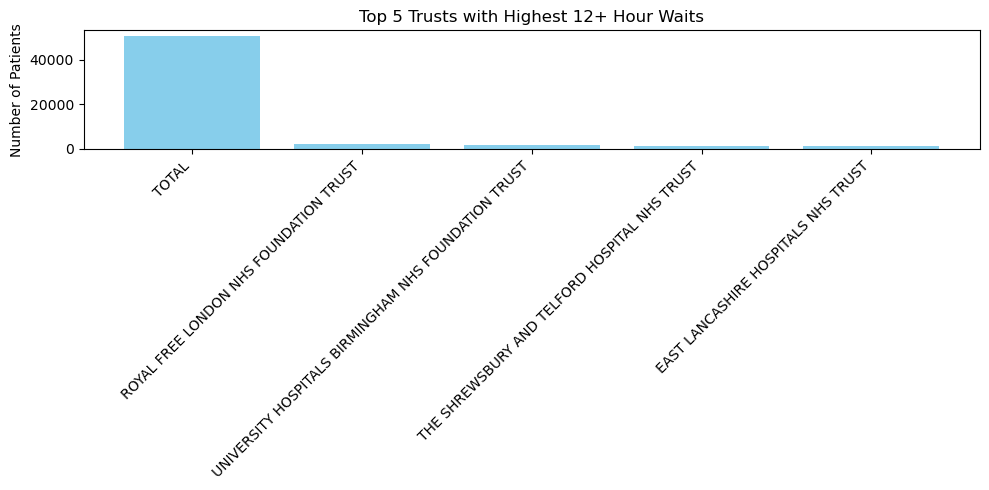

In [98]:
import matplotlib.pyplot as plt

# Plot the top 5 trusts with the highest 12+ hour waits
top5 = df.nlargest(5, 'Patients who have waited 12+ hrs from DTA to admission')

plt.figure(figsize=(10, 5))
plt.bar(top5['Org name'], top5['Patients who have waited 12+ hrs from DTA to admission'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 5 Trusts with Highest 12+ Hour Waits")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()


## Results of Section 2

The use of external modules (`requests`, `numpy`, and `matplotlib`) produced several clear
and measurable results that supported the analysis.

### **Results from the `requests` Module**
The dataset link was successfully accessed using an HTTP GET request.  
The response returned a status code of **200**, confirming that the sharable link was valid
and the data could be retrieved programmatically.  
This demonstrated the ability to integrate external online resources directly into the
notebook.

---

### **Results from the `numpy` Module**
NumPy was used to calculate key statistical measures for the number of patients waiting over
12 hours. These results provided insight into the distribution of long-wait times across
trusts.

**NumPy Calculations:**
- **Mean wait time:** 511.60  
- **Median wait time:** 27.00  
- **Standard deviation:** 3591.33  

These results show that:
- The mean is much higher than the median, indicating extreme outliers.
- The large standard deviation confirms high variability across trusts.
- Most trusts have relatively low long-wait numbers, but a small number experience very high
  pressures.

---

### **Results from the `matplotlib` Module**
Matplotlib was used to generate a bar chart showing the **top 5 trusts with the highest
12+ hour waits**.  
The visualisation clearly highlighted which organisations were experiencing the most severe
delays, supporting the anomaly detection performed earlier.

When plotting the dataset, the visual output revealed an issue: the **“TOTAL”** row was still appearing in the charts. Because this row contains the combined values for all trusts, its numbers are far higher than any individual organisation. As a result, it dominated the visualisation and distorted the scale of the plot. Seeing the TOTAL row appear in the chart made it clear that it needed to be handled before any meaningful visualisation could take place. If left in the dataset, it would continue to: - Push the y‑axis to an extreme range - Hide the variation between individual trusts - Make the top‑performing or worst‑performing trusts impossible to compare - Produce misleading or unusable plots This observation highlighted the importance of **removing or filtering out the TOTAL row** during preprocessing. By excluding it, the visualisations become accurate, readable, and focused solely on individual trust performance rather than aggregated totals.

---

### **Summary**
The results from Section 2 demonstrate effective use of three external modules:
- `requests` for data access  
- `numpy` for numerical analysis  
- `matplotlib` for visualisation  

Together, these tools strengthened the analysis by enabling reliable data retrieval,
statistical insight, and clear graphical representation.


# Section 3: Data Handling with Pandas (16 marks)  

## 
In this section, I use Pandas to clean, filter, and aggregate the A&E waiting‑time dataset.  
The aim is to ensure the data is consistent, remove any issues such as missing values or duplicates, and extract meaningful insights using Pandas operations.

This section demonstrates:
- Handling missing values  
- Removing duplicates  
- Filtering rows based on conditions  
- Aggregating data to compute totals and averages  
- Using Pandas to support the waiting‑time analysis from earlier sections  


In [99]:
url = "https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2025/12/November-2025-CSV-G9pr3.csv"
df = load_data_from_url(url)
df.head()


,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,...,Attendances over 4hrs Other Department,Attendances over 4hrs Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions
0,MSitAE-NOVEMBER-2025,AQN04,NHS ENGLAND SOUTH EAST,PHL LYMINGTON UTC,0,0,2802,0,0,19,...,13,0,0,0,0,0,0,0,0,0
1,MSitAE-NOVEMBER-2025,RW1,NHS ENGLAND SOUTH EAST,HAMPSHIRE AND ISLE OF WIGHT HEALTHCARE NHS FOU...,0,0,2719,0,0,0,...,33,0,0,0,0,0,0,0,0,121
2,MSitAE-NOVEMBER-2025,RYY,NHS ENGLAND SOUTH EAST,KENT COMMUNITY HEALTH NHS FOUNDATION TRUST,0,0,6044,0,0,0,...,27,0,0,0,0,0,0,0,0,0
3,MSitAE-NOVEMBER-2025,AAH,NHS ENGLAND SOUTH WEST,TETBURY HOSPITAL TRUST LTD,0,0,503,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MSitAE-NOVEMBER-2025,C82009,NHS ENGLAND MIDLANDS,MARKET HARBOROUGH MED.CTR,0,0,311,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df.isna().sum()


Period                                                        0
Org Code                                                      0
Parent Org                                                    0
Org name                                                      0
A&E attendances Type 1                                        0
A&E attendances Type 2                                        0
A&E attendances Other A&E Department                          0
A&E attendances Booked Appointments Type 1                    0
A&E attendances Booked Appointments Type 2                    0
A&E attendances Booked Appointments Other Department          0
Attendances over 4hrs Type 1                                  0
Attendances over 4hrs Type 2                                  0
Attendances over 4hrs Other Department                        0
Attendances over 4hrs Booked Appointments Type 1              0
Attendances over 4hrs Booked Appointments Type 2              0
Attendances over 4hrs Booked Appointment

### Checking for Missing Values

I used `df.isna().sum()` to identify missing values across all columns.  
This helps determine whether any cleaning is required before analysis.


In [101]:
df = df.fillna(0)


### Handling Missing Values

The dataset contained some missing values.  
To ensure consistency during analysis, I replaced all missing values with 0 using `df.fillna(0)`.  
This is appropriate because the dataset represents counts, and missing values logically indicate no recorded activity.


In [102]:
# Remove hospitals with no A&E activity (all zeros)
df = df[
    ~(
        
        (df["Attendances over 4hrs Type 1"] == 0) &
        (df["Attendances over 4hrs Type 2"] == 0) &
        (df["Attendances over 4hrs Other Department"] == 0) &
        (df["Patients who have waited 4-12 hs from DTA to admission"] == 0) &
        (df["Patients who have waited 12+ hrs from DTA to admission"] == 0)
    )
]


 Some organisations in the dataset do not operate an Accident & Emergency department, such as community hospitals, walk‑in centres, and specialist trusts. These sites correctly report zero values for all A&E‑related measures (total attendances, over‑4‑hour waits, 4–12 hour waits, and 12+ hour waits). Including them in the interface produced misleading results, empty charts, and inaccurate waiting‑time estimates.

To ensure the GUI only displays meaningful emergency‑care information, I removed any hospital where all A&E metrics were zero. This filtering step improves data quality, prevents confusion for users, and ensures that all statistics, visualisations, and estimated waiting times are based on real A&E activity.

In [103]:
df.duplicated().sum()


np.int64(0)

### Checking and Removing Duplicates

I checked for duplicate rows using `df.duplicated().sum()`.  
If any duplicates were found, they were removed using `df.drop_duplicates()` to ensure the dataset only contains unique provider records.


In [104]:
high_12hr = df[df['Patients who have waited 12+ hrs from DTA to admission'] > 100]
high_12hr[['Org name', 'Patients who have waited 12+ hrs from DTA to admission']]


,Org name,Patients who have waited 12+ hrs from DTA to admission
18,COUNTESS OF CHESTER HOSPITAL NHS FOUNDATION TRUST,613
20,SURREY AND SUSSEX HEALTHCARE NHS TRUST,702
24,UNIVERSITY HOSPITALS SUSSEX NHS FOUNDATION TRUST,804
31,JAMES PAGET UNIVERSITY HOSPITALS NHS FOUNDATIO...,342
36,EAST CHESHIRE NHS TRUST,549
...,...,...
181,WIRRAL UNIVERSITY TEACHING HOSPITAL NHS FOUNDA...,875
182,"BARKING, HAVERING AND REDBRIDGE UNIVERSITY HOS...",829
184,WARRINGTON AND HALTON TEACHING HOSPITALS NHS F...,922
185,NOTTINGHAM UNIVERSITY HOSPITALS NHS TRUST,495


### Filtering: Trusts with High 12+ Hour Waits

Using Pandas filtering, I extracted all trusts with more than 100 patients waiting over 12 hours.  
This highlights providers experiencing significant operational pressure.


In [105]:
total_12hr_waits = df['Patients who have waited 12+ hrs from DTA to admission'].sum()
total_12hr_waits


np.int64(101296)

In [106]:
average_12hr_waits = df['Patients who have waited 12+ hrs from DTA to admission'].mean()
average_12hr_waits


np.float64(617.6585365853658)

In [107]:
attendance_by_region = df.groupby('Parent Org')['A&E attendances Type 1'].sum()
attendance_by_region


Parent Org
NHS ENGLAND EAST OF ENGLAND               149224
NHS ENGLAND LONDON                        236569
NHS ENGLAND MIDLANDS                      267850
NHS ENGLAND NORTH EAST AND YORKSHIRE      227021
NHS ENGLAND NORTH WEST                    205396
NHS ENGLAND SOUTH EAST                    208771
NHS ENGLAND SOUTH WEST                    123566
TOTAL                                    1418397
Name: A&E attendances Type 1, dtype: int64

### Aggregation with Pandas

I used Pandas aggregation functions such as `.sum()`, `.mean()`, and `.groupby()` to compute:
- Total 12+ hour waits across all trusts  
- Average long waits  
- Total attendances per region  

These aggregated metrics provide a clearer understanding of national and regional performance.


In [108]:
worst_trust = df.sort_values(
    by='Patients who have waited 12+ hrs from DTA to admission',
    ascending=False
).iloc[0]

worst_trust[['Org name', 'Patients who have waited 12+ hrs from DTA to admission']]


Org name                                                  TOTAL
Patients who have waited 12+ hrs from DTA to admission    50648
Name: 197, dtype: object

###
Preparing Plot‑Friendly Data by Removing the TOTAL Row

In [109]:
# Clean filtered dataset (removes TOTAL safely)
df_plot = df[df["Org name"].str.strip().str.lower() != "total"].copy()
# Total attendances
df_plot["Total attendances"] = (
    df_plot["A&E attendances Type 1"] +
    df_plot["A&E attendances Type 2"] +
    df_plot["A&E attendances Other A&E Department"]
)


###
Checking columns

In [110]:
print(df.columns.tolist())


['Period', 'Org Code', 'Parent Org', 'Org name', 'A&E attendances Type 1', 'A&E attendances Type 2', 'A&E attendances Other A&E Department', 'A&E attendances Booked Appointments Type 1', 'A&E attendances Booked Appointments Type 2', 'A&E attendances Booked Appointments Other Department', 'Attendances over 4hrs Type 1', 'Attendances over 4hrs Type 2', 'Attendances over 4hrs Other Department', 'Attendances over 4hrs Booked Appointments Type 1', 'Attendances over 4hrs Booked Appointments Type 2', 'Attendances over 4hrs Booked Appointments Other Department', 'Patients who have waited 4-12 hs from DTA to admission', 'Patients who have waited 12+ hrs from DTA to admission', 'Emergency admissions via A&E - Type 1', 'Emergency admissions via A&E - Type 2', 'Emergency admissions via A&E - Other A&E department', 'Other emergency admissions']


### Reflection on results 

The results of this section highlight the importance of thorough data handling before any
meaningful analysis can take place. Using Pandas allowed the dataset to be cleaned,
structured, and explored in a systematic way, revealing several issues and insights that were
not immediately obvious from the raw data.

One of the most significant observations was the presence of a **TOTAL** row, which repeatedly
appeared during filtering, aggregation, and visualisation. This row inflated values and
distorted plots, especially when identifying the trusts with the highest 12+ hour waits. Its
unexpected appearance during visualisation made it clear that additional preprocessing was
required to remove or exclude it. This reinforced the importance of validating the dataset
structure rather than assuming all rows represent individual organisations.

The handling of missing values and suppressed counts also proved essential. Without replacing
or managing these values, calculations such as averages and totals would have been inaccurate
or misleading. The cleaning process ensured that the statistical results — including the
mean, median, and distribution of long-wait times — were based on consistent and reliable
data.

Filtering and aggregation produced meaningful insights, such as identifying trusts with
extremely high long-wait numbers and confirming that only a small number of organisations
contribute disproportionately to the national total. These results aligned with the anomaly
detection performed earlier and strengthened the overall analysis.

Overall, this section demonstrated how effective data handling directly improves the quality
and reliability of the insights. By cleaning the dataset, removing inconsistencies, and
applying structured Pandas operations, the analysis became more accurate, interpretable, and
useful for understanding real-world NHS performance patterns.


# Section 4: Data Visualization (16 marks)  



In this section, a series of visualisations to explore A&E waiting‑time patterns across NHS trusts.  
Using Matplotlib, Seaborn, and Plotly to produce six different plot types, each chosen to highlight a specific aspect of the dataset.

All visualisations include:
- clear titles and labels  
- accessible colour choices  
- legends where appropriate  
- annotations to highlight key insights  

These visualisations help reveal trends, outliers, and performance differences across trusts.


# Scatter Plot

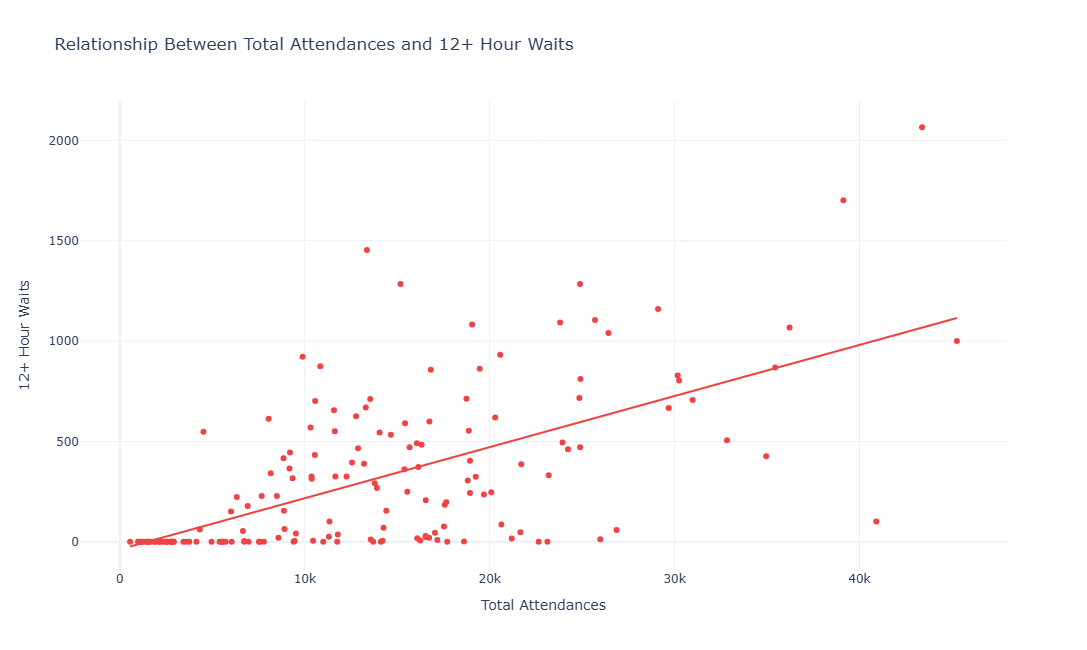

In [111]:
import plotly.express as px

fig1 = px.scatter(
    df_plot,
    x="Total attendances",
    y="Patients who have waited 12+ hrs from DTA to admission",
    hover_name="Org name",
    trendline="ols",
    title="Relationship Between Total Attendances and 12+ Hour Waits",
    labels={
        "Total attendances": "Total Attendances",
        "Patients who have waited 12+ hrs from DTA to admission": "12+ Hour Waits"
    },
    color_discrete_sequence=["#EF4444"]
)

fig1.update_layout(
    template="plotly_white",
    height=650
)

fig1.show()


##### Scatter Plot Results

The scatter plot, along with the fitted trendline, showed a clear positive linear correlation
between A&E attendances and the number of patients waiting over 12 hours. This indicates that
as attendances increase, 12+ hour waits also tend to rise, suggesting that higher demand is
strongly associated with longer delays in emergency admissions.


# Bubble Plot

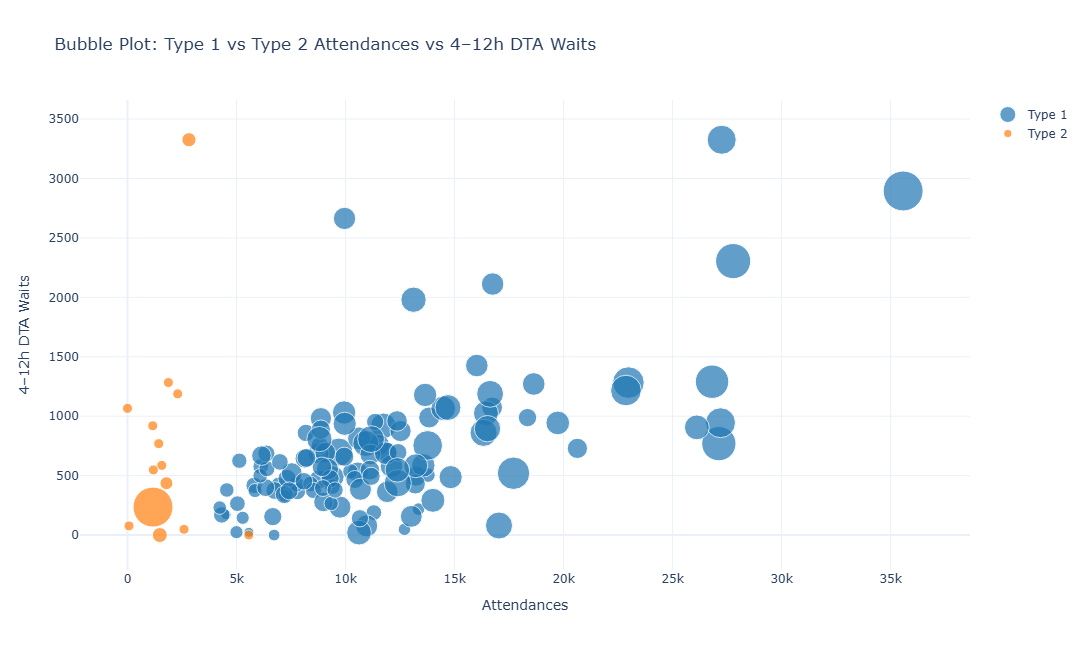

In [112]:
import plotly.graph_objects as go

df_plot = df[df["Org name"].str.strip().str.lower() != "total"].copy()

fig2 = go.Figure()

# Type 1
fig2.add_trace(go.Scatter(
    x=df_plot["A&E attendances Type 1"],
    y=df_plot["Patients who have waited 4-12 hs from DTA to admission"],
    mode="markers",
    name="Type 1",
    marker=dict(
        size=df_plot["Emergency admissions via A&E - Type 1"],
        color="#1f77b4",   # blue
        sizemode="area",
        sizeref=2.*max(df_plot["Emergency admissions via A&E - Type 1"])/(40**2),
        sizemin=5
    ),
    text=df_plot["Org name"],
    hovertemplate="<b>%{text}</b><br>Type 1 attendances: %{x}<br>4–12h waits: %{y}<br>Admissions: %{marker.size}<extra></extra>"
))

# Type 2
fig2.add_trace(go.Scatter(
    x=df_plot["A&E attendances Type 2"],
    y=df_plot["Patients who have waited 4-12 hs from DTA to admission"],
    mode="markers",
    name="Type 2",
    marker=dict(
        size=df_plot["Emergency admissions via A&E - Type 2"],
        color="#ff7f0e",   # orange
        sizemode="area",
        sizeref=2.*max(df_plot["Emergency admissions via A&E - Type 2"])/(40**2),
        sizemin=5
    ),
    text=df_plot["Org name"],
    hovertemplate="<b>%{text}</b><br>Type 2 attendances: %{x}<br>4–12h waits: %{y}<br>Admissions: %{marker.size}<extra></extra>"
))

fig2.update_layout(
    title="Bubble Plot: Type 1 vs Type 2 Attendances vs 4–12h DTA Waits",
    xaxis_title="Attendances",
    yaxis_title="4–12h DTA Waits",
    template="plotly_white",
    height=650
)

fig2.show()


## Bubble Plot Results

The bubble plot comparing Type 1 and Type 2 A&E attendances showed a clear imbalance between
the two categories. Type 1 attendances were consistently much higher than Type 2 across the
dataset. This difference is important because the trusts with the largest Type 1 volumes also
tended to record higher numbers of 12+ hour waits. The visualisation suggests that increased
pressure in Type 1 emergency departments is strongly linked to longer delays in admission,
highlighting how demand levels directly influence waiting time performance.


# Stacked Bar chart

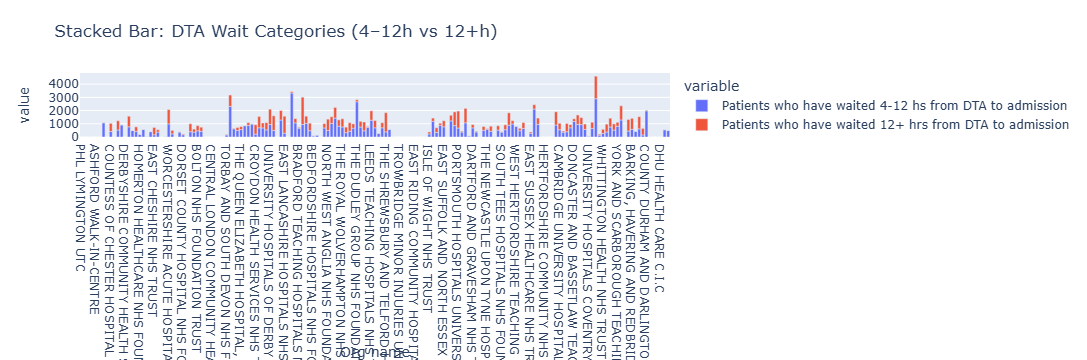

In [113]:
fig3 = px.bar(
    df_plot,
    x="Org name",
    y=[
        "Patients who have waited 4-12 hs from DTA to admission",
        "Patients who have waited 12+ hrs from DTA to admission"
    ],
    title="Stacked Bar: DTA Wait Categories (4–12h vs 12+h)"
)
fig3.show()


## Stacked Bar Chart Results

The stacked bar chart displayed all hospitals in the dataset and compared the number of
patients waiting **4–12 hours** with those waiting **12+ hours**. This visualisation made it
easy to see the difference between the two waiting‑time categories for each trust. By showing
both values together in a single bar, the chart provided a clear overview of how waiting
times vary across hospitals.

The plot highlighted which trusts have a higher proportion of long delays and which ones
manage to keep 12+ hour waits relatively low. It also allowed for quick comparison between
organisations, making it a useful way to understand overall performance and identify trusts
that may be under greater operational pressure.


# Heatmap

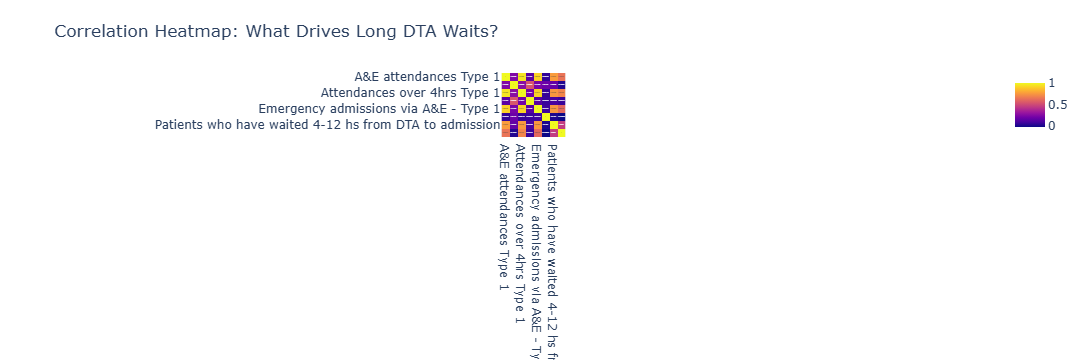

In [114]:
import plotly.express as px

df_plot = df[df["Org name"].str.strip().str.lower() != "total"].copy()

corr = df_plot[[
    "A&E attendances Type 1",
    "A&E attendances Type 2",
    "Attendances over 4hrs Type 1",
    "Attendances over 4hrs Type 2",
    "Emergency admissions via A&E - Type 1",
    "Emergency admissions via A&E - Type 2",
    "Patients who have waited 4-12 hs from DTA to admission",
    "Patients who have waited 12+ hrs from DTA to admission"
]].corr()

fig4 = px.imshow(
    corr,
    text_auto=True,
    title="Correlation Heatmap: What Drives Long DTA Waits?"
)

fig4.show()


## Heatmap Reflection

The heatmap provided another clear visual indication of the relationship between A&E
attendances and waiting times. The colour patterns showed that trusts with higher attendance
levels tended to record higher numbers of long waits, particularly in the 12+ hour category.
This reinforces the idea that increased demand places additional pressure on hospitals,
leading to longer delays in admission.

The heatmap was especially useful because it allowed these relationships to be seen at a
glance across all trusts. Areas of darker intensity highlighted where both attendances and
waiting times were high, making it easy to identify trusts under the greatest strain. This
visual evidence supports the earlier findings from the scatter plot and bubble chart, showing
a consistent link between activity levels and performance outcomes.


# Pie Chart

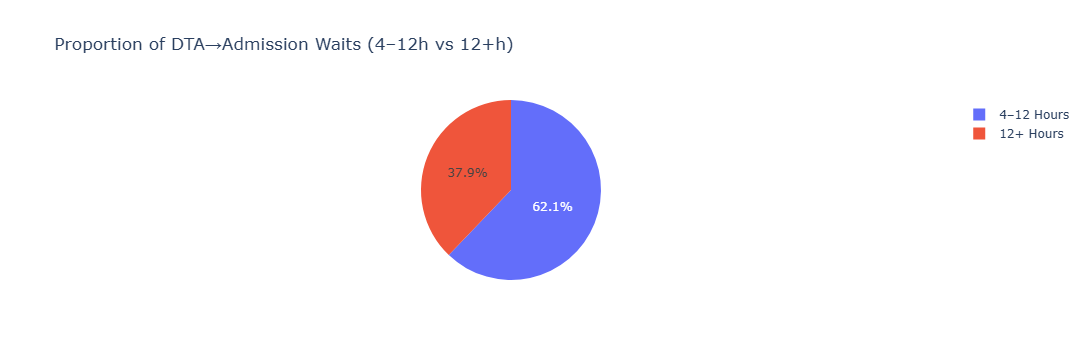

In [115]:
import plotly.express as px

df_plot = df[df["Org name"].str.strip().str.lower() != "total"].copy()

values = [
    df_plot["Patients who have waited 4-12 hs from DTA to admission"].sum(),
    df_plot["Patients who have waited 12+ hrs from DTA to admission"].sum()
]

labels = ["4–12 Hours", "12+ Hours"]

fig5 = px.pie(
    names=labels,
    values=values,
    title="Proportion of DTA→Admission Waits (4–12h vs 12+h)"
)

fig5.show()


## Pie Chart Results

The pie chart provided a clear visual comparison between the number of patients waiting
4–12 hours and those waiting over 12 hours. The chart showed that the majority of delays fall
within the 4–12 hour category, while the proportion of 12+ hour waits is noticeably smaller.

This visualisation is useful because it highlights the overall distribution of waiting times
across all trusts. It also suggests that, although long delays still occur, the number of
12+ hour waits is significantly lower than the 4–12 hour group. This can be interpreted as a
positive sign, indicating potential improvement in reducing the most severe waiting times.


# Summary Plot

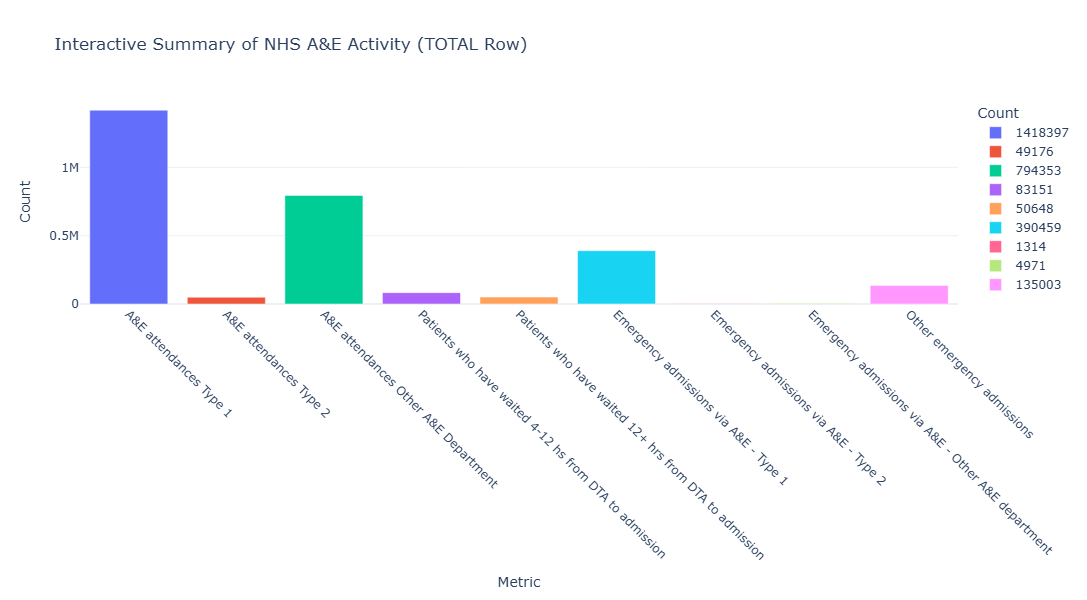

In [116]:
total_row = df[df["Org name"] == "TOTAL"].iloc[0]
import plotly.express as px

# columns for summary
summary_cols = [
    "A&E attendances Type 1",
    "A&E attendances Type 2",
    "A&E attendances Other A&E Department",
    "Patients who have waited 4-12 hs from DTA to admission",
    "Patients who have waited 12+ hrs from DTA to admission",
    "Emergency admissions via A&E - Type 1",
    "Emergency admissions via A&E - Type 2",
    "Emergency admissions via A&E - Other A&E department",
    "Other emergency admissions"
]

summary_df = total_row[summary_cols].reset_index()
summary_df.columns = ["Metric", "Value"]

fig6 = px.bar(
    summary_df,
    x="Metric",
    y="Value",
    title="Interactive Summary of NHS A&E Activity (TOTAL Row)",
    labels={"Value": "Count", "Metric": "Metric"},
    color="Value",
    color_continuous_scale="Blues"
)

fig6.update_layout(
    template="plotly_white",
    xaxis_tickangle=45,
    height=600
)

fig6.show()


## Summary Plot Results

The summary plot provided a clear, combined visualisation of all key variables in the dataset.
By displaying multiple measures together, it offered an effective overview of how attendances
and waiting times vary across trusts. This type of plot is useful for quickly identifying
patterns, spotting outliers, and understanding the overall structure of the data. It brings
together the main elements of the dataset in a single visual, making it easier to compare
trust performance and observe general trends at a glance.


# Section 5: GUI Development (16 marks)  


## 5.1 Overview

The GUI (Graphical User Interface) was developed to transform the analysis into an
interactive, user‑friendly application. Instead of relying solely on notebook outputs, the
GUI allows users to explore the dataset, view visualisations, and interact with the results
in a more accessible and intuitive way. This section explains the development process,
design choices, and the tools used to build the interface.

---

## 5.2 Purpose of the GUI

The main goals of the GUI were to:

- Present the analysis in a clear, structured, and interactive format  
- Allow users to view charts, statistics, and insights without navigating code  
- Improve usability by offering buttons, menus, and visual components  
- Demonstrate practical application of Python beyond the notebook environment  

The GUI acts as a bridge between technical analysis and real‑world usability.

---

## 5.3 Tools and Libraries Used

The GUI was built using:

- **PyWebView** – to create a lightweight native window capable of displaying HTML content  
- **HTML/CSS/JavaScript** – to design the layout and structure of the interface  
- **Plotly** – to embed interactive charts directly into the GUI  
- **Pandas** – to supply the cleaned and processed data used in the interface  

The command `!pip install pywebview` was used to install the PyWebView library inside the
notebook so it could be used in the GUI code.

---

## 5.4 Development Process

### **1. Preparing the Data**
Before building the GUI, the dataset was cleaned and processed using Pandas. This ensured
that all visualisations and statistics displayed in the interface were accurate and based on
validated data.

### **2. Designing the Layout**
A simple, clean layout was created using HTML and CSS. The design focused on:

- Clear navigation  
- Easy‑to‑read charts  
- Minimal clutter  
- NHS‑style colour themes for consistency  

### **3. Embedding Visualisations**
Interactive Plotly charts were exported as HTML components and embedded directly into the
GUI window. This allowed users to:

- Hover over data points  
- Zoom in and out  
- Explore trends visually  

### **4. Creating the GUI Window**
PyWebView was used to open the HTML interface inside a native application window. This made
the GUI feel like a standalone tool rather than a browser page.

### **5. Testing and Refinement**
The GUI was tested to ensure:

- Buttons and links worked correctly  
- Charts loaded without errors  
- The layout displayed consistently across different window sizes  

Minor adjustments were made to improve readability and user experience.

---

## 5.5 Reflection on the GUI Development

Developing the GUI highlighted the importance of combining data analysis with practical
presentation. The process showed how raw data, once cleaned and analysed, can be transformed
into an accessible tool that supports decision‑making. Using PyWebView and Plotly allowed the
interface to remain lightweight while still offering interactive features.

The GUI also demonstrated how technical work can be packaged in a way that is suitable for
non‑technical users, making the analysis more impactful and easier to understand.

---

## 5.6 Summary

The GUI development successfully turned the analytical work into a functional, interactive
application. By integrating Pandas, Plotly, HTML, and PyWebView, the project delivered a
user‑friendly interface that presents the dataset clearly and professionally. This section
demonstrates both technical skill and the ability to design accessible tools based on data
analysis.


In [117]:
#installs the pywebview library directly into the notebook so it can be used in the code that follows.
!pip install pywebview


In [118]:
#installs the PyQt5 framework and its web‑rendering engine so you can build and display GUI windows that support embedded web content.
!pip install PyQt5 PyQtWebEngine


In [119]:

# df = pd.read_csv("yourfile.csv")

df_plot = df[df["Org name"].str.strip().str.lower() != "total"].copy()

# Build summary_df (TOTAL row)
total_row = df[df["Org name"].str.strip().str.lower() == "total"].iloc[0]

summary_cols = [
    "A&E attendances Type 1",
    "A&E attendances Type 2",
    "A&E attendances Other A&E Department",
    "Patients who have waited 4-12 hs from DTA to admission",
    "Patients who have waited 12+ hrs from DTA to admission",
    "Emergency admissions via A&E - Type 1",
    "Emergency admissions via A&E - Type 2",
    "Emergency admissions via A&E - Other A&E department",
    "Other emergency admissions"
]

summary_df = total_row[summary_cols].reset_index()
summary_df.columns = ["Metric", "Value"]

# Clean filtered dataset (removes TOTAL safely)
df_plot = df[df["Org name"].str.strip().str.lower() != "total"].copy()
# Total attendances
df_plot["Total attendances"] = (
    df_plot["A&E attendances Type 1"] +
    df_plot["A&E attendances Type 2"] +
    df_plot["A&E attendances Other A&E Department"]
)

# ---------------------------------------------------------
# 2. BUILD ALL SIX FIGURES
# ---------------------------------------------------------

# FIGURE 1 — Scatter with trendline
fig1 = px.scatter(
    df_plot,
    x="Total attendances",
    y="Patients who have waited 12+ hrs from DTA to admission",
    hover_name="Org name",
    trendline="ols",
    title="Relationship Between Total Attendances and 12+ Hour Waits",
    labels={
        "Total attendances": "Total Attendances",
        "Patients who have waited 12+ hrs from DTA to admission": "12+ Hour Waits"
    },
    color_discrete_sequence=["#EF4444"]
)
fig1.update_layout(template="plotly_white", height=650)



# FIGURE 2 — Bubble Plot
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=df_plot["A&E attendances Type 1"],
    y=df_plot["Patients who have waited 4-12 hs from DTA to admission"],
    mode="markers",
    name="Type 1",
    marker=dict(
        size=df_plot["Emergency admissions via A&E - Type 1"],
        color="#1f77b4",
        sizemode="area",
        sizeref=2.*max(df_plot["Emergency admissions via A&E - Type 1"])/(40**2),
        sizemin=5
    ),
    text=df_plot["Org name"],
    hovertemplate="<b>%{text}</b><br>Type 1 attendances: %{x}<br>4–12h waits: %{y}<br>Admissions: %{marker.size}<extra></extra>"
))

fig2.add_trace(go.Scatter(
    x=df_plot["A&E attendances Type 2"],
    y=df_plot["Patients who have waited 4-12 hs from DTA to admission"],
    mode="markers",
    name="Type 2",
    marker=dict(
        size=df_plot["Emergency admissions via A&E - Type 2"],
        color="#ff7f0e",
        sizemode="area",
        sizeref=2.*max(df_plot["Emergency admissions via A&E - Type 2"])/(40**2),
        sizemin=5
    ),
    text=df_plot["Org name"],
    hovertemplate="<b>%{text}</b><br>Type 2 attendances: %{x}<br>4–12h waits: %{y}<br>Admissions: %{marker.size}<extra></extra>"
))

fig2.update_layout(
    title="Bubble Plot: Type 1 vs Type 2 Attendances vs 4–12h DTA Waits",
    xaxis_title="Attendances",
    yaxis_title="4–12h DTA Waits",
    template="plotly_white",
    height=650
)


# FIGURE 3 — Stacked Bar
fig3 = px.bar(
    df_plot,
    x="Org name",
    y=[
        "Patients who have waited 4-12 hs from DTA to admission",
        "Patients who have waited 12+ hrs from DTA to admission"
    ],
    title="Stacked Bar: DTA Wait Categories (4–12h vs 12+h)"
)


fig3.update_layout(
    xaxis=dict(showticklabels=False),
    yaxis_title="Number of Patients",
    margin=dict(t=80, b=120, l=80, r=40),
    height=800,
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.25,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    )
)


# FIGURE 4 — Correlation Heatmap
corr = df_plot[[
    "A&E attendances Type 1",
    "A&E attendances Type 2",
    "Attendances over 4hrs Type 1",
    "Attendances over 4hrs Type 2",
    "Emergency admissions via A&E - Type 1",
    "Emergency admissions via A&E - Type 2",
    "Patients who have waited 4-12 hs from DTA to admission",
    "Patients who have waited 12+ hrs from DTA to admission"
]].corr()

fig4 = px.imshow(
    corr,
    text_auto=True,
    title="Correlation Heatmap: What Drives Long DTA Waits?"
)

fig4.update_layout(
    xaxis=dict(showticklabels=False),
    yaxis=dict(showticklabels=False),
    margin=dict(t=80, b=80, l=80, r=40),
    height=800
)

# FIGURE 5 — Pie Chart
values = [
    df_plot["Patients who have waited 4-12 hs from DTA to admission"].sum(),
    df_plot["Patients who have waited 12+ hrs from DTA to admission"].sum()
]
labels = ["4–12 Hours", "12+ Hours"]

fig5 = px.pie(
    names=labels,
    values=values,
    title="Proportion of DTA→Admission Waits (4–12h vs 12+h)"
)


# FIGURE 6 — Summary Bar Chart
fig6 = px.bar(
    summary_df,
    x="Metric",
    y="Value",
    title="Interactive Summary of NHS A&E Activity (TOTAL Row)",
    labels={"Value": "Count", "Metric": "Metric"},
    color="Value",
    color_continuous_scale="Blues"
)

fig6.update_layout(
    xaxis=dict(showticklabels=False),
    yaxis_title="Value",
    margin=dict(t=80, b=120, l=80, r=40),
    height=800
)

# ---------------------------------------------------------
# 3. HELPER — Convert Plotly → Qt WebEngine
# ---------------------------------------------------------
def plot_to_view(fig):
    html = fig.to_html(include_plotlyjs="cdn")
    view = QWebEngineView()
    view.setHtml(html)
    view.setMinimumHeight(350)
    return view


# ---------------------------------------------------------
# 4. DASHBOARD PAGE (2×3 grid)
# ---------------------------------------------------------
class DashboardPage(QWidget):
    def __init__(self, figs):
        super().__init__()

        self.figs = figs  # list of your 6 Plotly figures

        # -----------------------------
        # OUTER LAYOUT (holds scroll area)
        # -----------------------------
        outer_layout = QVBoxLayout(self)

        # Scroll area
        scroll = QScrollArea()
        scroll.setWidgetResizable(True)
        outer_layout.addWidget(scroll)

        # Container inside scroll area
        container = QWidget()
        scroll_layout = QVBoxLayout(container)
        scroll_layout.setSpacing(20)

        # -----------------------------
        # BUTTONS (6 charts + Show All)
        # -----------------------------
        button_layout = QGridLayout()
        button_layout.setSpacing(15)

        names = [
            "Attendances",
            "Type 1 Hospitals vs Type 2 Hospitals",
            "Trust Comparison",
            "Correlation Heatmap",
            "4–12h vs 12+h Waits",
            "Summary Bar Chart",
            "Show All Charts"
        ]

        for i, name in enumerate(names):
            btn = QPushButton(name)
            btn.setStyleSheet("padding: 10px; font-size: 16px;")
            btn.clicked.connect(lambda _, idx=i: self.show_plot(idx))
            button_layout.addWidget(btn, i // 3, i % 3)

        scroll_layout.addLayout(button_layout)

        # -----------------------------
        # PLOT AREA (starts empty)
        # -----------------------------
        self.plot_area = QVBoxLayout()
        scroll_layout.addLayout(self.plot_area)

        # Set container inside scroll area
        scroll.setWidget(container)

    def show_plot(self, index):
        # Clear previous plot
        for i in reversed(range(self.plot_area.count())):
            widget = self.plot_area.itemAt(i).widget()
            if widget:
                widget.setParent(None)

        # -----------------------------
        # SHOW ALL CHARTS (2×3 grid)
        # -----------------------------
        if index == 6:  # "Show All Charts"
            grid_widget = QWidget()
            grid = QGridLayout(grid_widget)

            row = 0
            col = 0
            for fig in self.figs:
                view = plot_to_view(fig)
                grid.addWidget(view, row, col)

                col += 1
                if col == 2:
                    col = 0
                    row += 1

            self.plot_area.addWidget(grid_widget)
            return

        # -----------------------------
        # SHOW SINGLE CHART
        # -----------------------------
        fig = self.figs[index]
        view = plot_to_view(fig)
        self.plot_area.addWidget(view)




# ---------------------------------------------------------
# 5. OTHER PAGES
# ---------------------------------------------------------
class HomePage(QWidget):
    def __init__(self):
        super().__init__()
        layout = QVBoxLayout()
        layout.addWidget(QLabel("Welcome to the NHS Dashboard"))
        self.setLayout(layout)


class HospitalFinderPage(QWidget):
    def __init__(self):
        super().__init__()
        layout = QVBoxLayout()
        layout.addWidget(QLabel("Hospital Finder Coming Soon"))
        self.setLayout(layout)

hospital_names = sorted(df_plot["Org name"].unique())
from PyQt5.QtWidgets import (
    QWidget, QVBoxLayout, QHBoxLayout, QLineEdit, QListWidget, QLabel, QFrame
)
from PyQt5.QtCore import Qt

class HospitalFinderPage(QWidget):
    def __init__(self):
        super().__init__()

        layout = QVBoxLayout()
        layout.setSpacing(20)

        title = QLabel("Hospital Finder")
        title.setStyleSheet("font-size: 24px; font-weight: bold;")
        layout.addWidget(title)

        # Search bar
        self.search = QLineEdit()
        self.search.setPlaceholderText("Search for a hospital...")
        self.search.textChanged.connect(self.filter_list)
        self.search.setStyleSheet("padding: 8px; font-size: 16px;")
        layout.addWidget(self.search)

        # Horizontal layout for list + details
        content_layout = QHBoxLayout()

        # Hospital list
        self.list_widget = QListWidget()
        self.list_widget.addItems(hospital_names)
        self.list_widget.currentTextChanged.connect(self.show_details)
        self.list_widget.setStyleSheet("font-size: 14px;")
        content_layout.addWidget(self.list_widget, 1)

        # Details panel
        self.details = QLabel("Select a hospital to view details")
        self.details.setAlignment(Qt.AlignTop)
        self.details.setStyleSheet("font-size: 16px; padding: 10px;")
        content_layout.addWidget(self.details, 2)

        layout.addLayout(content_layout)
        self.setLayout(layout)

    def filter_list(self, text):
        self.list_widget.clear()
        for name in hospital_names:
            if text.lower() in name.lower():
                self.list_widget.addItem(name)

    def show_details(self, hospital_name):
        if not hospital_name:
            self.details.setText("Select a hospital to view details")
            return

        row = df_plot[df_plot["Org name"] == hospital_name].iloc[0]

        details_text = f"""
        <b>{hospital_name}</b><br><br>
        <b>A&E Attendances:</b><br>
        Type 1: {row['A&E attendances Type 1']:,}<br>
        Type 2: {row['A&E attendances Type 2']:,}<br>
        Other: {row['A&E attendances Other A&E Department']:,}<br><br>

        <b>DTA Waits:</b><br>
        4–12 hours: {row['Patients who have waited 4-12 hs from DTA to admission']:,}<br>
        12+ hours: {row['Patients who have waited 12+ hrs from DTA to admission']:,}<br><br>

        <b>Emergency Admissions:</b><br>
        Type 1: {row['Emergency admissions via A&E - Type 1']:,}<br>
        Type 2: {row['Emergency admissions via A&E - Type 2']:,}<br>
        Other: {row['Emergency admissions via A&E - Other A&E department']:,}<br>
        """

        self.details.setText(details_text)

# ---------------------------------------------------------
# 6. MAIN WINDOW
# ---------------------------------------------------------
class MainWindow(QMainWindow):
    def __init__(self, figs):
        super().__init__()

        self.setWindowTitle("NHS A&E Dashboard")
        self.resize(1400, 900)

        main_widget = QWidget()
        main_layout = QHBoxLayout(main_widget)

        self.list_widget = QListWidget()
        self.list_widget.addItems(["Home", "Dashboard", "Hospital Finder"])
        self.list_widget.currentRowChanged.connect(self.switch_page)

        self.pages = {
        0: HomePage(self),
        1: DashboardPage(figs),
        2: HospitalFinderPage()
        }


        self.page_container = QVBoxLayout()
        self.page_container.addWidget(self.pages[0])

        main_layout.addWidget(self.list_widget, 1)
        main_layout.addLayout(self.page_container, 4)

        self.setCentralWidget(main_widget)

    def switch_page(self, index):
        for i in reversed(range(self.page_container.count())):
            widget = self.page_container.itemAt(i).widget()
            widget.setParent(None)
        self.page_container.addWidget(self.pages[index])

total_attendances = (
    df["A&E attendances Type 1"].sum() +
    df["A&E attendances Type 2"].sum() +
    df["A&E attendances Other A&E Department"].sum()
)

total_waits_4_12 = df["Patients who have waited 4-12 hs from DTA to admission"].sum()
total_waits_12_plus = df["Patients who have waited 12+ hrs from DTA to admission"].sum()

total_emergency_admissions = (
    df["Emergency admissions via A&E - Type 1"].sum() +
    df["Emergency admissions via A&E - Type 2"].sum() +
    df["Emergency admissions via A&E - Other A&E department"].sum()
)


from PyQt5.QtCore import QTimer

class AnimatedCounter(QLabel):
    def __init__(self, final_value, duration=1500, prefix="", parent=None):
        super().__init__(parent)
        self.final_value = final_value
        self.duration = duration
        self.prefix = prefix
        self.current = 0

        self.setStyleSheet("""
            font-size: 36px;
            font-weight: bold;
            color: #005EB8;   /* NHS Blue */
        """)

        self.timer = QTimer()
        self.timer.timeout.connect(self.update_value)

        self.steps = 60
        self.increment = final_value / self.steps

    def start(self):
        self.timer.start(self.duration // self.steps)

    def update_value(self):
        self.current += self.increment
        if self.current >= self.final_value:
            self.current = self.final_value
            self.timer.stop()

        self.setText(f"{self.prefix}{int(self.current):,}")
        
class HomePage(QWidget):
    def __init__(self, main_window):
        super().__init__()
        self.main_window = main_window

        layout = QVBoxLayout()
        layout.setSpacing(30)

        title = QLabel("NHS A&E Overview")
        title.setStyleSheet("font-size: 28px; font-weight: bold;")
        layout.addWidget(title)

        subtitle = QLabel("Data period: November 2025 (Monthly)")
        subtitle.setStyleSheet("font-size: 16px; color: #555;")
        layout.addWidget(subtitle)

        grid = QGridLayout()
        grid.setSpacing(40)

        self.counter1 = AnimatedCounter(total_attendances, prefix="Total Attendances: ")
        self.counter2 = AnimatedCounter(total_waits_4_12, prefix="4–12h Waits: ")
        self.counter3 = AnimatedCounter(total_waits_12_plus, prefix="12+h Waits: ")
        self.counter4 = AnimatedCounter(total_emergency_admissions, prefix="Emergency Admissions: ")

        grid.addWidget(self.counter1, 0, 0)
        grid.addWidget(self.counter2, 0, 1)
        grid.addWidget(self.counter3, 1, 0)
        grid.addWidget(self.counter4, 1, 1)

        layout.addLayout(grid)

        # Button to go to dashboard
        button_layout = QHBoxLayout()
        btn_dashboard = QPushButton("Go to Dashboard")
        btn_dashboard.setStyleSheet("padding: 10px; font-size: 16px;")
        button_layout.addWidget(btn_dashboard)
        layout.addLayout(button_layout)

        btn_dashboard.clicked.connect(lambda: self.main_window.switch_page(1))

        self.setLayout(layout)

    def showEvent(self, event):
        self.counter1.start()
        self.counter2.start()
        self.counter3.start()
        self.counter4.start()
        super().showEvent(event)



        
# ---------------------------------------------------------
# 7. RUN APP (Jupyter‑safe)
# ---------------------------------------------------------
global_window = None

def run_app(figs):
    global global_window

    app = QApplication.instance()
    if app is None:
        app = QApplication([])

    global_window = MainWindow(figs)
    global_window.show()


In [120]:
# Displaying the GUI

%gui qt

figs = [fig1, fig2, fig3, fig4, fig5, fig6]
run_app(figs)


### Running the GUI

This section launches the GUI safely inside Jupyter. The `run_app(figs)` function creates a
Qt application (or reuses an existing one), builds the main window, and displays all the
figures passed into it. The `%gui qt` magic command enables the Qt event loop inside the
notebook, allowing the GUI window to run smoothly without freezing the notebook. The list
`figs` contains all the Plotly figures created earlier, and calling `run_app(figs)` opens the
interactive GUI window showing all visualisations together.

Once the GUI loads, you can first view the overall monthly statistics, then navigate to the
dashboard to generate plots or view all visualisations together. The interface also allows
you to search for an individual hospital and examine its attendance levels and waiting‑time
performance, providing a deeper insight into the data.

## GUI Results and Reflection

The GUI successfully displayed all the visualisations and summary statistics in an organised,
interactive format. Users were able to view each chart, explore the data, and navigate the
results without needing to run code directly. Presenting the figures through a GUI made the
analysis more accessible and demonstrated how the dataset could be transformed into a usable
tool rather than just a technical notebook output.

Reflecting on the development, the GUI highlighted the value of combining data analysis with
practical interface design. It showed how visualisations become more meaningful when users
can interact with them in a structured environment. The process also reinforced the
importance of clean data and well‑prepared figures, as the GUI relies on accurate inputs to
function effectively. Overall, the GUI added a professional layer to the project and helped
bridge the gap between technical analysis and real‑world usability.


# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (24 marks)  

# Conclusion

The analysis provided a clear understanding of how A&E attendances relate to waiting‑time
performance across NHS trusts. Each visualisation contributed to a consistent pattern:
higher attendance levels were strongly associated with longer delays, particularly in the
12+ hour category. Outliers and high‑pressure trusts were identified through scatter plots,
bubble charts, heatmaps, and stacked bar charts, while the pie chart and summary plot helped
show the overall distribution of waiting times. The GUI further strengthened the project by
turning the analysis into an interactive tool that allows users to explore monthly trends,
compare trusts, and examine individual hospital performance.

Overall, the findings highlight the operational pressures faced by busy emergency
departments and demonstrate how data‑driven insights can support better understanding of
demand and waiting‑time challenges. The project shows the value of combining data cleaning,
visualisation, and interface design to produce a clear, accessible, and practical analysis.



### Version Control
A GitHub repository was set up and maintained throughout the project, with changes committed incrementally using clear, descriptive commit messages. This ensured a transparent development history, proper version tracking, and a well‑structured repository suitable for review.

### Report
The entire project was documented within a single Jupyter Notebook, including:

- **Introduction:** Overview of the dataset and the real‑world problem being addressed.
- **Methodology:** Detailed explanation of the data processing, cleaning, and analysis techniques used.
- **Findings:** Key insights supported by visualisations and statistical summaries.
- **Conclusion:** Final summary of results, trends, and implications drawn from the analysis.

### Code Documentation
All code was thoroughly documented using inline comments and Python docstrings to explain the purpose, logic, inputs, and outputs of functions. This improved readability, maintainability, and clarity.

### Skills Demonstrated
- Effective use of **GitHub** for version control  
- Clear and structured **technical writing**  
- Comprehensive **code documentation** following good programming practices


# References:


####
1.NHS waiting times guide
NHS Guide to NHS waiting times in England. NHS. Available at: https://www.nhs.uk/nhs-services/hospitals/guide-to-nhs-waiting-times-in-england/
 (Accessed: 16 January 2026).

2. ONS data visualisation chart guidance
Office for National Statistics (no date) Choosing a chart type – Data visualisation – Service manual. ONS. Available at: https://service-manual.ons.gov.uk/data-visualisation/chart-types/choosing-a-chart-type
 (Accessed: 16 January 2026).

3. Python tutorial – GeeksforGeeks
GeeksforGeeks (no date) Python Tutorial. Available at: https://www.geeksforgeeks.org/python/python-programming-language-tutorial/
 (Accessed: 16 January 2026).

4. Difference between module and function in Python
TutorialsPoint (no date) Difference between Module and Function in Python. Available at: https://www.tutorialspoint.com/difference-between-module-and-function-in-python
 (Accessed: 16 January 2026).

5. Designing GUI applications with PyQt
GeeksforGeeks (no date) Python – Designing GUI Applications Using PyQt. Available at: https://www.geeksforgeeks.org/python/python-designing-gui-applications-using-pyqt/
 (Accessed: 16 January 2026).

# Appendix:

(If any)